# Question 1

Note: I will use $\gamma$ and $\lambda$ interchangeably in this notebook. 

# "Calculate numerically how the equilibrium in the workers’ application game changes with the wage offers of the two firms"

In [2]:
var('Y','w_1','w_2','pi_H','pi_L','gamma')

(Y, w_1, w_2, pi_H, pi_L, gamma)

## Expressions for $pi_H$ and $pi_L$

First we want to find $\pi_H$ and $\pi_L$. As we went over in class, we know that if $\lambda\frac{w_1}{2}+(1-\lambda)w_1 > w_2$, then $\pi_H = 1$, and that if $\lambda\frac{w_2}{2}+(1-\lambda)w_2 > w_1$ then $\pi_H = 0$. So the only thing we need to find is the case where niether of those inequalities hold, and the high type worker will play a mixed strategy. 

In [44]:
f1 = gamma*(pi_H*(w_1/2)+(1-pi_H)*w_1)+(1-gamma)*w_1
f2 = gamma*(pi_H*w_2+(1-pi_H)*(w_2/2))+(1-gamma)*w_2
piH = solve((f1==f2),(pi_H))
show(piH)

[pi_H == ((gamma - 2)*w_2 + 2*w_1)/(gamma*w_1 + gamma*w_2)]

$$
\pi_H(w_1, w_2) = \left\{\begin{array}{lr}
        1 & \text{ if } \lambda\frac{w_1}{2}+(1-\lambda)w_1 > w_2\\
        \
        0 & \text{if } w_1 < \lambda\frac{w_2}{2}+(1-\lambda)w_2
        \\
        \frac{{\left(\gamma - 2\right)} w_{2} + 2 \, w_{1}}{\gamma w_{1} +    \gamma w_{2}} & otherwise\
       \
        \end{array}\right. 
$$


For $\pi_L$, I am just going to use the strategy rule given in the 'directed search incomplete information' notebook. 


$$
\pi_L(w_1, w_2) = 
\left\{\begin{array}{lr}
  \frac{(1-\lambda)(2w_1-w_2)}{(w_1+w_2)-\lambda(w_1-w_2)} & \text{ if } \lambda\frac{w_1}{2}+(1-\lambda)w_1\ge w_2 \\
  \frac{(3-\lambda)w_2-2w_1}{(1-\lambda)(w_1+w_2)} & \text{if } w_1>w_2; \lambda\frac{w_1}{2}+(1-\lambda)w_1\le w_2 \\
  \frac{(3-\lambda)w_1-2w_2}{(1-\lambda)(w_2+w_1)} & \text{if } w_2>w_1; \lambda\frac{w_2}{2}+(1-\lambda)w_2\le w_1 \\ 
  \frac{(1-\lambda)(2w_2-w_1)}{(w_2+w_1)-\lambda(w_2-w_1)} & \text{ otherwise. } 
\end{array}\right.
$$

In [4]:
piHRHS = piH[0].rhs()
show(piHRHS)

((gamma - 2)*w_2 + 2*w_1)/(gamma*w_1 + gamma*w_2)

In [5]:
piL = ((3-gamma)*w_2-2*w_1)/((1-gamma)*(w_1+w_2))
show(piL)

((gamma - 3)*w_2 + 2*w_1)/((gamma - 1)*(w_1 + w_2))

## Setting $\gamma$ to 1 to see how $\pi_H$ changes in response to changes in $w_1$ and $w_2$ 

In [6]:
gamma1 = piHRHS.subs(gamma=1)
show(piHRHS.subs(gamma=1))

(2*w_1 - w_2)/(w_1 + w_2)

Let's see how $\pi_H$ changes. First let's do $w_1=w_2*2$

In [7]:
gamma1.subs(w_1=w_2*2)

1

So we get $\pi_H = 1$

Now let's do, $w_2=w_1*2$

In [8]:
gamma1.subs(w_2=w_1*2)

0

So here we get $\pi_H = 0$

Now we will set $w_1 = 1$, and see what we get for $pi_H$

In [10]:
gamma1FixW1 = gamma1.subs(w_1=1)
show(gamma1.subs(w_1=1))

-(w_2 - 2)/(w_2 + 1)

Now we implement the strategy rule, $\pi_H$ as a piecewise function, and we plot it from varying $w_2$ from 0 to 2. 

In [11]:
f = piecewise([[(-infinity, 0.5),1],[(0.5, 1.5), gamma1FixW1],[(1.5,infinity),0]])

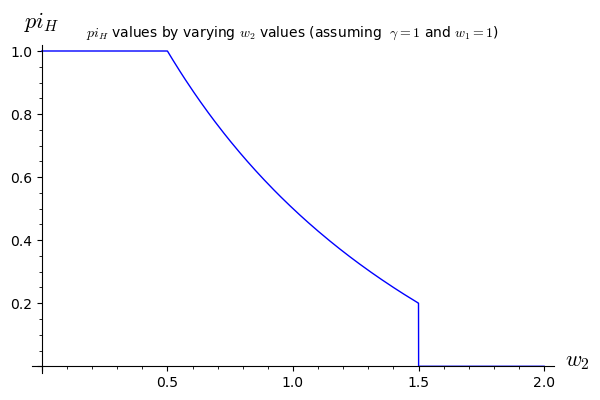

In [12]:
plot(f,(w_2,0,2),axes_labels=['$w_2$','$pi_H$'],title= r'$pi_H$ values by varying $w_2$ values (assuming  $\gamma = 1$ and $w_1 = 1$)')

## Fixing $\gamma$ to 0.5 to see changes in $w_1$ and $w_2$ for $\pi_L$

Now we want to see how $\pi_L$ changes as $w_2$ and $w_1$ changes. We will use $\gamma = 0.5$, since $\gamma = 1$ does not really make sense here. Since it would mean there are no low types at all, so $\pi_L$ would be irrelevant. 

In [13]:
gamma1L = piL.subs(gamma=0.5)
show(piL.subs(gamma=0.5))

-2.00000000000000*(2*w_1 - 2.50000000000000*w_2)/(w_1 + w_2)

If $w1=w2*2$

In [14]:
gamma1L.subs(w_1=w_2*2)

-1.00000000000000

If $w2=w1*2$

In [15]:
gamma1L.subs(w_2=w_1*2)

2.00000000000000

In [16]:
gamma1LFixW1 = gamma1L.subs(w_1=1)
show(gamma1L.subs(w_1=1))

-2.00000000000000*(-2.50000000000000*w_2 + 2)/(w_2 + 1)

Here I implement a piecewise function, I plot it by varying $w_2$. 

In [17]:
condition1 = (0.5)*(2-w_2)/(1+w_2)-0.5*(1-w_2)
condition2 = (0.5)*(2*w_2-1)/(1+w_2)-0.5*(w_2-1)

In [18]:
g = piecewise([[(-infinity, 0.75),condition1],[(0.75,1),(gamma1LFixW1)],[(1,infinity),condition2]])

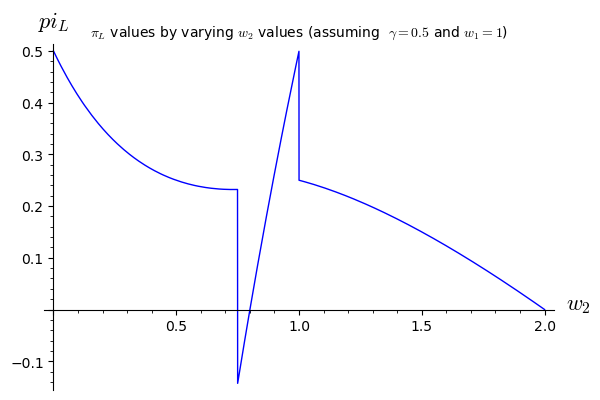

In [23]:
plot(g,(w_2,0,2),axes_labels=['$w_2$','$pi_L$'],title= r'$\pi_L$ values by varying $w_2$ values (assuming  $\gamma = 0.5$ and $w_1 = 1$)')

# "Calculate solutions numerically for different values of λ and show that if the worker types are equally productive and the two firms’ revenues are the same, there will be no sub-game perfect equilibrium in which firms offer the same wage."

## If wages are equal then lambda does not factor into $pi_H$ nor $pi_L$

In [28]:
wage1 = piHRHS.subs(w_1=50,w_2=50)
show(wage1)

1/2

In [29]:
wage1L = piL.subs(w_1=50,w_2=50)
show(wage1L)

1/2

If we want to find a symmetric equilibrium for when high type workers are more productive than low type workers, but both firms have the same revenue, from the above we see that $\lambda$ does not matter. $\pi_H$ and $\pi_L$ will be $\frac{1}{2}$ no matter what the value of $\lambda$ is.